# D208 Linear Regression Modeling
By Luis Medina, Student ID: 012020203


## A1: Research Question
For this question I am going to be looking at the churn data set to answer a question. The question I'm asking is "How do customer service factors and usage patterns influence monthly charges for customers?" I will be switching up the dataset for this project just to try something new. This question is important for companies to answer, as it can address core aspects of their business model and financial performance. Therefore, we need insights into these questions, to help companies more effective strategies for customer retention and overall business success in a challenging and competitive market.

## A2: Goals Of the Analysis
One of the primary goals of this analysis is to identify any key factors that significantly impact monthly charges for customers. This will help companies to understand the relationship between customer service factors, usage patterns, and monthly charges. Another goal of the analysis is going to quantify the relationship between these factors and monthly charges. I will be developing a predictive model for monthly charges based on customer attributes. Then, this will lead to actionable insights that the company can use for better pricing operations and customer service strategies.

## B1: Summary of Assumptions
Here I will be summarizing four assumptions of multiple linear regression models.
- First it's linearity, meaning that there needs to exist a relationship between independent variables and the dependent variable. 
- Second is independence, here we must see if the observations are independent of each other. If they are not independent then it can lead to incorrect values. 
- Then, it's equal variances, also known as homoscedasticity, which is that the variance of the residuals is constant across all independent variables.
- Finally, it's normality, meaning that the residuals are normally distributed. 


## B2: Tool Benefits
For this project I will strictly be using Python as I enjoy its ease with being able to perform statistical modeling and creating visualizations with the many packages it offers. Also, python has more visualization capabilities for exploratory data analysis. Another, benefit is of being is being able to create a notebook that can have both the code and markdown for presentation. Then looking at the libraries like Numpy and Pandas makes it even easier to handle data manipulation and analysis more efficiently to create better models. Also, having the libraries Matplotlib and Seaborn makes creating visualizations for the data easier. Lastly, with Scikit-Learn this is extremely helpful with building models, like the multiple linear regression that will be used in this project.

## B3: Appropriate Technique
Multiple linear regression is meant to be used for modeling relationships between multiple independent variables and a dependent variable. This is an appropriate technique for this project as I will be looking at how customer service factors and usage patterns influence monthly charges for customers. Using multiple linear regression will allow me to see the relationship between these factors and monthly charges. With this information I will be able to create a predictive model that can be used for monthly charges based on customer attributes. Another, helpful thing that we can do is gain insight into which variables are most important for making predictions, by being able to see the p-values and coefficients of the independent variables.  Furthermore, using multiple linear regression would not be suitable if the relationship between the dependent and independent variables is not linear.

In [80]:
# Import needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy import stats

import warnings
warnings.filterwarnings('ignore')


In [81]:
df = pd.read_csv('churn_clean.csv')
df.head(10)

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5
5,6,W303516,2b451d12-6c2b-4cea-a295-ba1d6bced078,97598fd95658c80500546bc1dd312994,Fort Valley,GA,Peach,31030,32.57032,-83.89040,...,185.007692,1039.357983,3,3,3,2,4,3,3,3
6,7,U335188,6630d501-838c-4be4-a59c-6f58c814ed6a,87d1c4223e49156020564c01a88973b9,Pioneer,TN,Scott,37847,36.43420,-84.27892,...,200.118516,1907.242972,6,5,6,4,1,5,5,5
7,8,V538685,70ddaa89-b726-49dc-9022-2d655e4c7936,fce3f21888317907de42e298d718ccce,Oklahoma City,OK,Oklahoma,73109,35.43313,-97.52463,...,114.950905,979.612708,2,2,2,5,2,3,4,5
8,9,M716771,05a49ee3-8fd5-453a-a5f3-82b6cd986856,6c7043ced703b84de29766af3d53c976,Saint Cloud,FL,Osceola,34771,28.27646,-81.16273,...,117.468591,1312.874964,5,4,4,3,4,3,4,4
9,10,I676080,86f17e4d-2c24-4b70-a6ec-dddf0609dbaa,6ffe183271258a039e122ced8750b2a0,Cincinnati,OH,Hamilton,45237,39.19296,-84.45230,...,162.482694,508.763791,2,2,2,2,5,2,3,3


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

## C1: Data Cleaning
The goal for this section is to fix any improperly formatted data, checking to see if there are any duplicate values, null values and outliers. This is important to do as it can affect the quality of the model. If there are many outliers then I will have to standardize the data. Then, some of the variables will be dropped as I believe they are not needed for the model. Finally, I will convert some of the categorical data into numerical format to use for the model. 

## C2: Summary Statistics
Now in this part I will be going over the variables that I will be using for my model and throughout the project. First, the dependent variable will be monthly charges and the independent variables will be tenure, badwidth_BG_year, age, income, outage_sec_perweek, email, and contacts. I will perform some summary statistics on the variables to see the mean, median, standard deviation, and the range of the data. 

In [83]:
# renaming the columns so its easier to use
col_head = {
    'CaseOrder': 'case_order',
    'Customer_id': 'customer_id',
    'Interaction': 'interaction',
    'City': 'city',
    'State': 'state',
    'County': 'county',
    'Zip': 'zip',
    'Lat': 'lat',
    'Lng': 'lng',
    'Population': 'population',  
    'Area': 'area',  
    'Job': 'job',
    'Children': 'children',
    'Age': 'age', 
    'Income': 'income',  
    'Marital': 'marital_type',
    'Gender': 'gender',
    'Churn': 'churn',
    'Outage_sec_perweek': 'outage_sec_perweek',
    'Email': 'email',
    'Contacts': 'contacts',
    'Yearly_equip_failure': 'yearly_equip_failure',
    'Techie': 'techie',
    'Contract': 'contract',
    'Port_modem': 'port_modem',
    'Tablet': 'tablet',
    'InternetService': 'internet_service',
    'Phone': 'phone',
    'Multiple': 'multiple_lines',
    'OnlineSecurity': 'online_security',
    'OnlineBackup': 'online_backup',
    'DeviceProtection': 'device_protection',
    'TechSupport': 'tech_support',
    'StreamingTV': 'streaming_tv',
    'StreamingMovies': 'streaming_movies',
    'PaperlessBilling': 'paperless_billing',
    'PaymentMethod': 'payment_method',
    'Tenure': 'tenure',
    'MonthlyCharge': 'monthly_charge',
    'Bandwidth_GB_Year': 'bandwidth_gb_year',
    'Item1': 'timely_response',
    'Item2': 'timely_fixes',
    'Item3': 'timely_replacements',
    'Item4': 'reliability',
    'Item5': 'options',
    'Item6': 'respectful_response',
    'Item7': 'courteous_exchange',
    'Item8': 'active_listening'}
df.rename(columns=col_head, inplace=True)

# dropping the columns that are not needed
df = df.drop(columns=['customer_id', 'interaction', 'city', 'state', 'county', 'zip','marital_type', 'lat', 'lng', 'population'])


In [84]:
# gather the numerical columns to perform summary statistics
num_cols = df.select_dtypes(exclude=['object'])

In [85]:
num_cols.describe()

,case_order,children,age,income,outage_sec_perweek,email,contacts,yearly_equip_failure,tenure,monthly_charge,bandwidth_gb_year,timely_response,timely_fixes,timely_replacements,reliability,options,respectful_response,courteous_exchange,active_listening
count,10000.00000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,2.0877,53.078400,39806.926771,10.001848,12.016000,0.994200,0.398000,34.526188,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2886.89568,2.1472,20.698882,28199.916702,2.976019,3.025898,0.988466,0.635953,26.443063,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,1.00000,0.0000,18.000000,348.670000,0.099747,1.000000,0.000000,0.000000,1.000259,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,0.0000,35.000000,19224.717500,8.018214,10.000000,0.000000,0.000000,7.917694,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,1.0000,53.000000,33170.605000,10.018560,12.000000,1.000000,0.000000,35.430507,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,7500.25000,3.0000,71.000000,53246.170000,11.969485,14.000000,2.000000,1.000000,61.479795,200.734725,5586.141370,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,10.0000,89.000000,258900.700000,21.207230,23.000000,7.000000,6.000000,71.999280,290.160419,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [86]:
df['tenure'].describe()

count    10000.000000
mean        34.526188
std         26.443063
min          1.000259
25%          7.917694
50%         35.430507
75%         61.479795
max         71.999280
Name: tenure, dtype: float64

In [87]:
df['bandwidth_gb_year'].describe()

count    10000.000000
mean      3392.341550
std       2185.294852
min        155.506715
25%       1236.470827
50%       3279.536903
75%       5586.141370
max       7158.981530
Name: bandwidth_gb_year, dtype: float64

In [88]:
df['age'].describe()

count    10000.000000
mean        53.078400
std         20.698882
min         18.000000
25%         35.000000
50%         53.000000
75%         71.000000
max         89.000000
Name: age, dtype: float64

In [89]:
df['income'].describe()

count     10000.000000
mean      39806.926771
std       28199.916702
min         348.670000
25%       19224.717500
50%       33170.605000
75%       53246.170000
max      258900.700000
Name: income, dtype: float64

In [90]:
df['outage_sec_perweek'].describe()

count    10000.000000
mean        10.001848
std          2.976019
min          0.099747
25%          8.018214
50%         10.018560
75%         11.969485
max         21.207230
Name: outage_sec_perweek, dtype: float64

In [91]:
df['email'].describe()

count    10000.000000
mean        12.016000
std          3.025898
min          1.000000
25%         10.000000
50%         12.000000
75%         14.000000
max         23.000000
Name: email, dtype: float64

In [92]:
df['contacts'].describe()

count    10000.000000
mean         0.994200
std          0.988466
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          7.000000
Name: contacts, dtype: float64

`Age` has a total of 10,000 observations with a min of 18 and max of 89. The average for age is 53 years old.
 
`bandwidth_gb_year` has a total of 10,000 observations with a min of 0.0 and max of 5932.61. The average for bandwidth_gb_year is 3392.44.

`income` has a total of 10,000 observations with a min of 0 and max of 258900. The average for income is 39806.93.

`outage_sec_perweek` has a total of 10,000 observations with a min of 0.1 and max of 47.64. The average for outage_sec_perweek is 11.45.

`email` has a total of 10,000 observations with a min of 0 and max of 30. The average for email is 12.0.

`contacts` has a total of 10,000 observations with a min of 0 and max of 7. The average for contacts is 0.99.


In [93]:
num_cols.corr()

,case_order,children,age,income,outage_sec_perweek,email,contacts,yearly_equip_failure,tenure,monthly_charge,bandwidth_gb_year,timely_response,timely_fixes,timely_replacements,reliability,options,respectful_response,courteous_exchange,active_listening
case_order,1.000000,-0.006148,0.016038,0.000192,-0.001358,-0.011274,0.004361,0.005497,0.832550,0.003677,0.825561,-0.004318,0.005959,0.003245,-0.005641,0.016429,-0.007837,0.003595,-0.014840
children,-0.006148,1.000000,-0.029732,0.009942,0.001889,0.004479,-0.020776,0.007321,-0.005091,-0.009781,0.025585,0.011470,0.013146,0.003394,-0.016768,-0.000240,-0.000547,0.000687,-0.005236
age,0.016038,-0.029732,1.000000,-0.004091,-0.008047,0.001588,0.015068,0.008577,0.016979,0.010729,-0.014724,-0.005972,0.006659,-0.003778,0.012237,-0.008305,0.010635,0.005353,0.015193
income,0.000192,0.009942,-0.004091,1.000000,-0.010011,-0.009267,0.001233,0.005423,0.002114,-0.003014,0.003674,-0.004009,0.007718,-0.002707,-0.022750,0.011111,0.001768,0.016599,0.000740
outage_sec_perweek,-0.001358,0.001889,-0.008047,-0.010011,1.000000,0.003994,0.015092,0.002909,0.002932,0.020496,0.004176,-0.023338,-0.008076,-0.021366,-0.005992,-0.004156,-0.014752,-0.020854,0.008126
email,-0.011274,0.004479,0.001588,-0.009267,0.003994,1.000000,0.003040,-0.016354,-0.014468,0.001997,-0.014579,0.003709,0.001156,0.012928,0.000915,-0.007929,0.014468,0.010010,-0.005857
contacts,0.004361,-0.020776,0.015068,0.001233,0.015092,0.003040,1.000000,-0.006032,0.002820,0.004259,0.003299,-0.007364,-0.003003,-0.021924,0.001071,0.004698,-0.000994,0.004579,-0.012615
yearly_equip_failure,0.005497,0.007321,0.008577,0.005423,0.002909,-0.016354,-0.006032,1.000000,0.012435,-0.007172,0.012034,0.007518,-0.009773,-0.009372,-0.006906,0.003416,-0.003995,-0.010368,-0.009859
tenure,0.832550,-0.005091,0.016979,0.002114,0.002932,-0.014468,0.002820,0.012435,1.000000,-0.003337,0.991495,-0.006246,0.003073,0.002351,-0.006714,0.024618,-0.010127,0.000410,-0.016347
monthly_charge,0.003677,-0.009781,0.010729,-0.003014,0.020496,0.001997,0.004259,-0.007172,-0.003337,1.000000,0.060406,0.009756,0.003442,-0.008487,-0.000440,-0.005562,0.002943,-0.006399,0.002204


In [94]:
correlation = num_cols.corrwith(num_cols['monthly_charge'])
print(correlation)

case_order              0.003677
children               -0.009781
age                     0.010729
income                 -0.003014
outage_sec_perweek      0.020496
email                   0.001997
contacts                0.004259
yearly_equip_failure   -0.007172
tenure                 -0.003337
monthly_charge          1.000000
bandwidth_gb_year       0.060406
timely_response         0.009756
timely_fixes            0.003442
timely_replacements    -0.008487
reliability            -0.000440
options                -0.005562
respectful_response     0.002943
courteous_exchange     -0.006399
active_listening        0.002204
dtype: float64


Based on the results from correlation matrix, it seems that the variables `bandwidth_gb_year`, `income`, and `age` have a positive correlation with `monthly_charge`. While the variables `outage_sec_perweek`, `email`, and `contacts` have a negative correlation with `monthly_charge`.

In [95]:
mean_charge = df.groupby('churn')['monthly_charge'].mean()
print(mean_charge)

churn
No     163.008973
Yes    199.295175
Name: monthly_charge, dtype: float64


Based on the results from the mean monthly charges, it seems that customers who have churned have a higher average monthly charge compared to customers who have not churned.

## C3: Visualizations


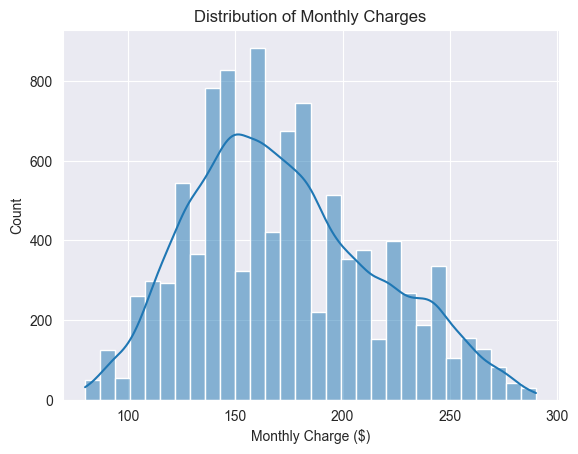

In [96]:
# create a histogram for monthly charges
sns.histplot(data=df, x='monthly_charge', bins=30, kde=True)
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charge ($)')
plt.ylabel('Count')
plt.show()

Here the histogram shows the distribution of monthly charges for customers. The distribution is slightly right-skewed with a peak at around $150.

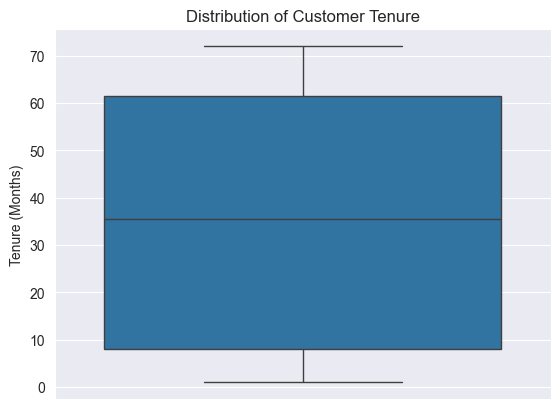

In [97]:
# create a boxplot for tenure
sns.boxplot(data=df, y='tenure')
plt.title('Distribution of Customer Tenure')
plt.ylabel('Tenure (Months)')
plt.show()

Here the boxplot shows that the average tenure for customers is at around 35 months. There are some outliers in the data that have a tenure of over 70 months.

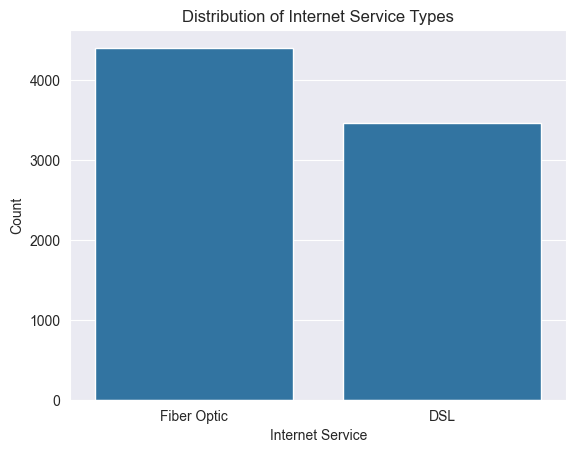

In [98]:
# create a count plot for Internet Service
sns.countplot(data=df, x='internet_service')
plt.title('Distribution of Internet Service Types')
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.show()

By looking at the count plot we can clearly see that the most common internet service type is Fiber Optic.

Now I will create some bivariate visualizations to see the relationship between the independent variables and the dependent variable.

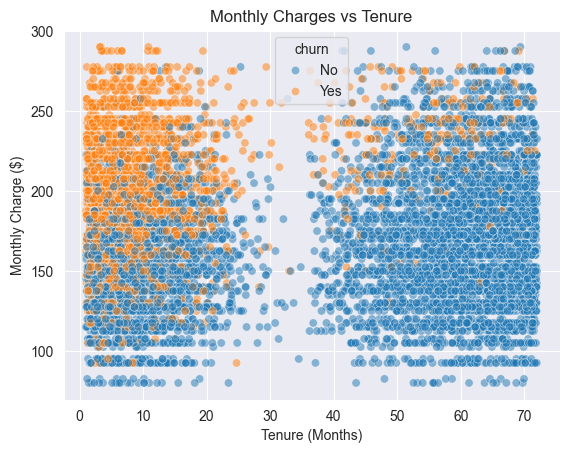

In [99]:
# create a scatter plot for monthly charges vs tenure.
sns.scatterplot(data=df, x='tenure', y='monthly_charge', hue='churn', alpha=0.5)
plt.title('Monthly Charges vs Tenure')
plt.xlabel('Tenure (Months)')
plt.ylabel('Monthly Charge ($)')
plt.show()

The scatter plot shows the relationship between monthly charges and tenure for customers. It seems that customers who have churned have a higher monthly charge compared to customers who have not churned.

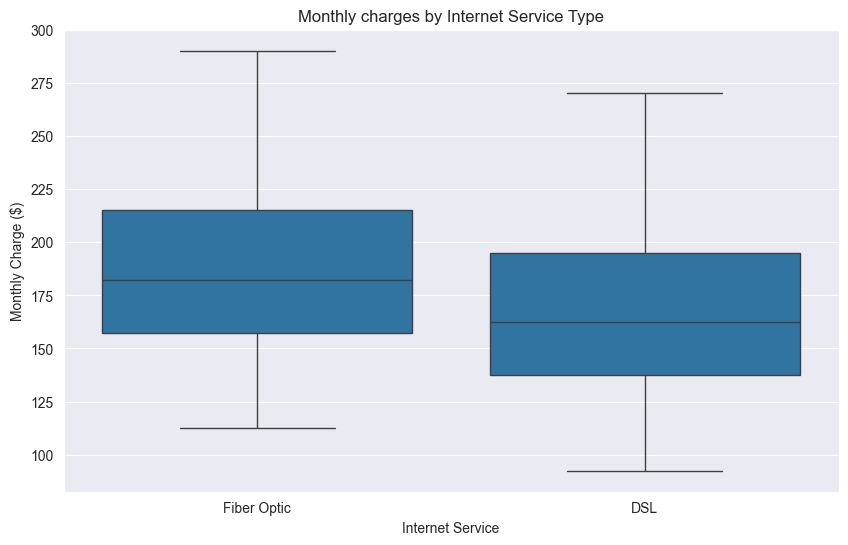

In [100]:
# create a boxplot for monthly charges vs internet service
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='internet_service', y='monthly_charge')
plt.title('Monthly charges by Internet Service Type')
plt.xlabel('Internet Service')
plt.ylabel('Monthly Charge ($)')
plt.show()

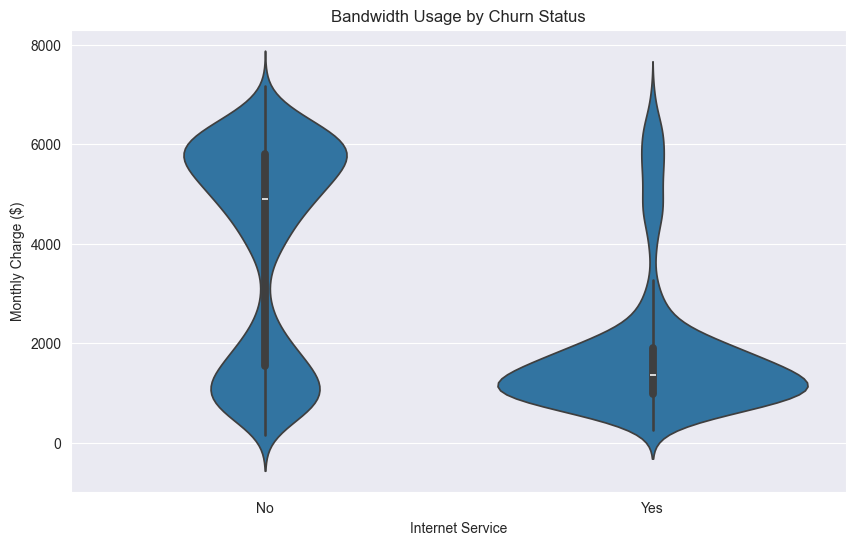

In [101]:
# create a violin plot for bandwidth_gb_year by churn
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x='churn', y='bandwidth_gb_year')
plt.title('Bandwidth Usage by Churn Status')
plt.xlabel('Internet Service')
plt.ylabel('Monthly Charge ($)')  
plt.show()

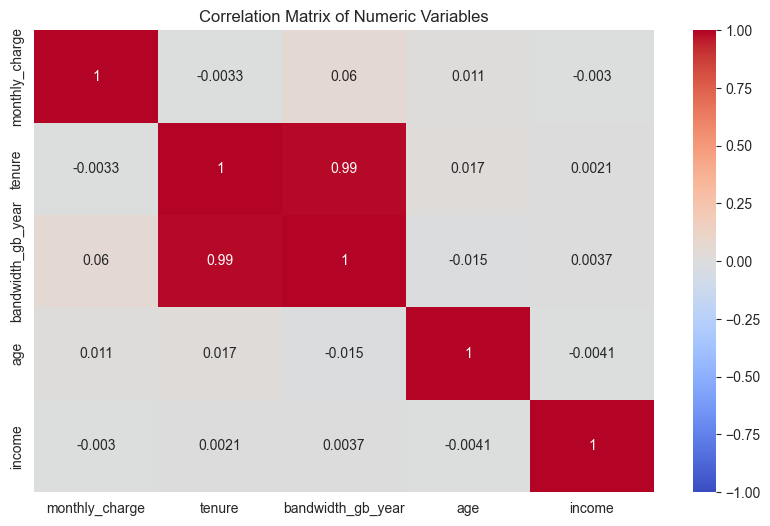

In [102]:
numeric_col =['monthly_charge', 'tenure', 'bandwidth_gb_year', 'age', 'income']
corr_matrix = df[numeric_col].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Matrix of Numeric Variables')
plt.show()

The heatmap shows the correlation matrix of the numeric variables. It seems that `bandwidth_gb_year`, `income`, and `age` have a positive correlation with `monthly_charge`. While `tenure` has a negative correlation with `monthly_charge`.

## C4: Data Transformation

The goals for this section will be to transform the data, so it's easier to work with when creating the multi-linear regression model. First, I will be normalizing the numerical variables to be able to use while working on the data. Next, I will create dummy variables for the categorical variables to use for the model.

In [103]:
# First select the numerical columns normalize
numeric_cols = ['tenure', 'bandwidth_gb_year', 'monthly_charge', 'age', 'income', 'outage_sec_perweek']

# Normalize the numerical columns
scaler = StandardScaler()

# Fit and transform the data
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [106]:
# Create dummy variables for the categorical columns
categorical_columns = ['internet_service', 'contract', 'payment_method']

# create dummy variables
df_dummies = pd.get_dummies(df[categorical_columns], drop_first=True)

# add the dummy variables into the original dataframe
df = pd.concat([df, df_dummies], axis=1)

# drop the original categorical columns
df = df.drop(columns=categorical_columns)

## C5: Prepared Data Set
Now I will provide the updated CSV file with the newly transformed data and cleaned data.

In [108]:
df.to_csv('churn_clean_transformed.csv', index=False)

## D1: Initial Model